In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations

# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [24]:
def is_shattered(d, n, S_n, visualise=False, kernel='linear'):
    return_value = True
    for L in range(n + 1):
        idxs = [i for i in range(n)]
        for subset in combinations(idxs, L):
            y = np.zeros(n)
            y[list(subset)] = 1
            result = 0
            if not (y.sum() == 0 or y.sum() == n):
                svc = SVC(C=10000, shrinking=False, kernel=kernel, tol=1e-5)
                svc.fit(S_n,y)
                result = abs(sum(svc.predict(S_n) - y))

            if visualise:
                vis = sns.scatterplot(x=S_n[:,0], y=S_n[:,1],hue=y)
                title = 'False' if result > 0 else 'True'
                color = 'red' if result > 0 else 'green'
                vis.set_title(title,{'color' : color})
                plt.show()

            if result > 0:
                return_value = False
    return return_value
                  

### c)

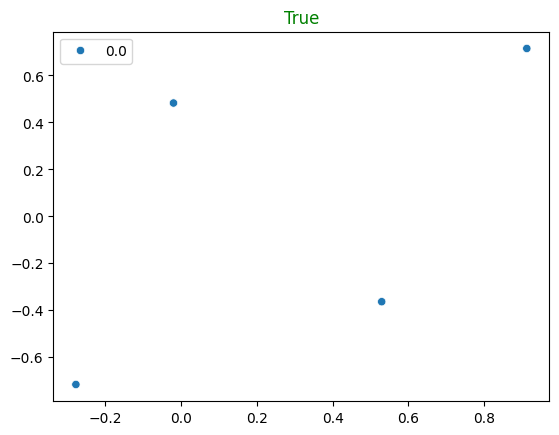

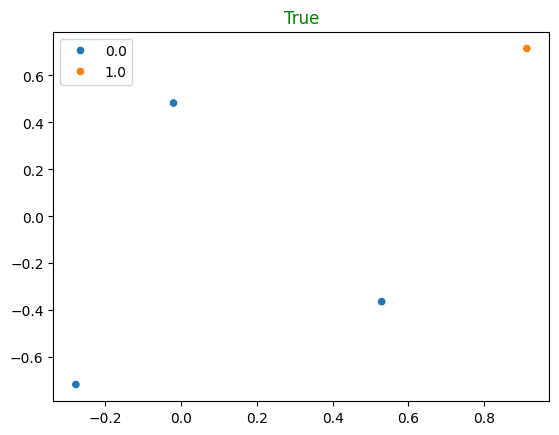

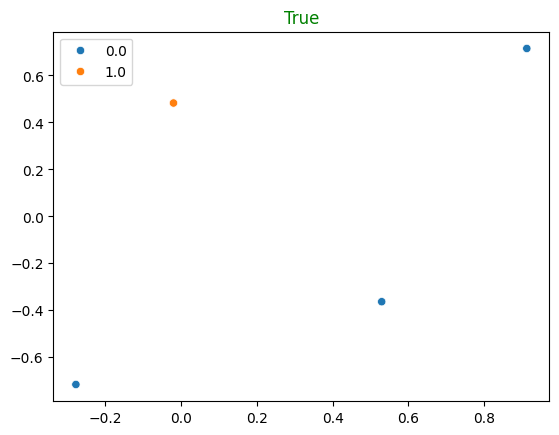

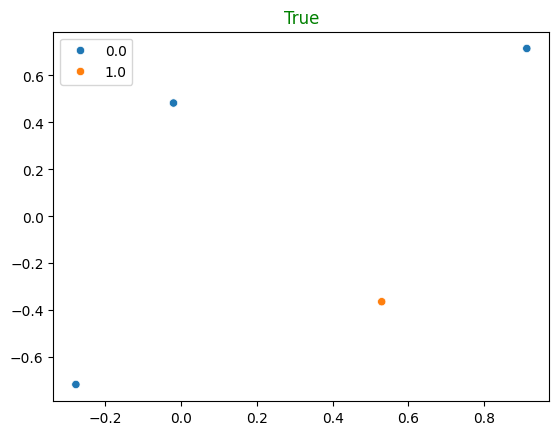

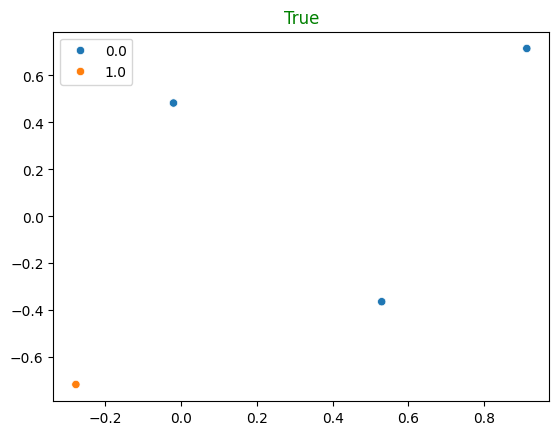

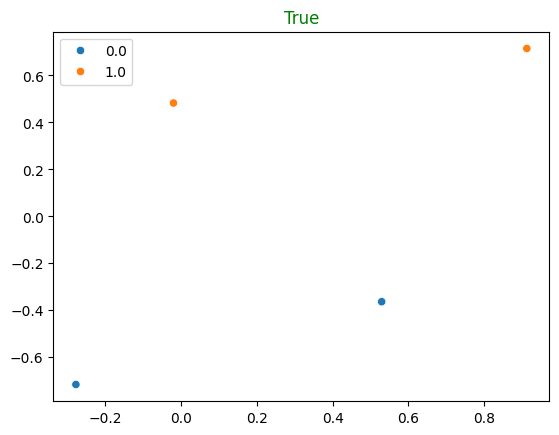

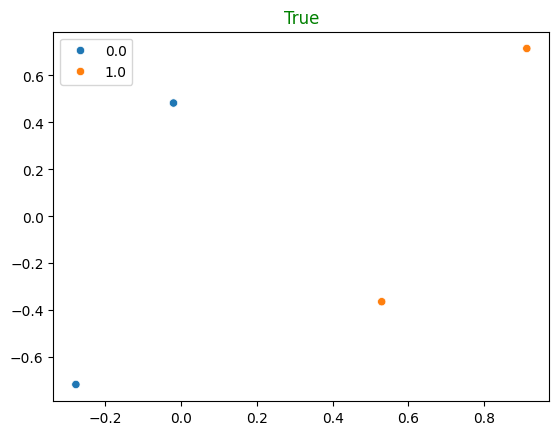

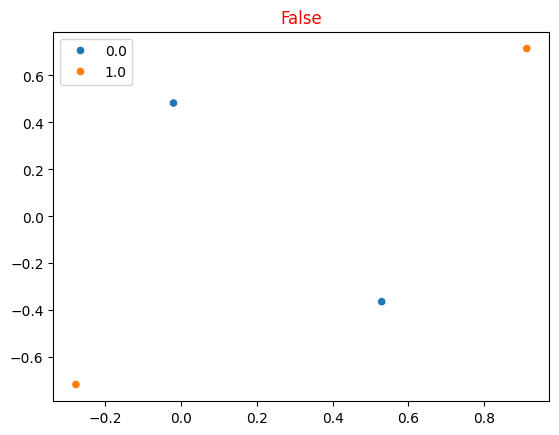

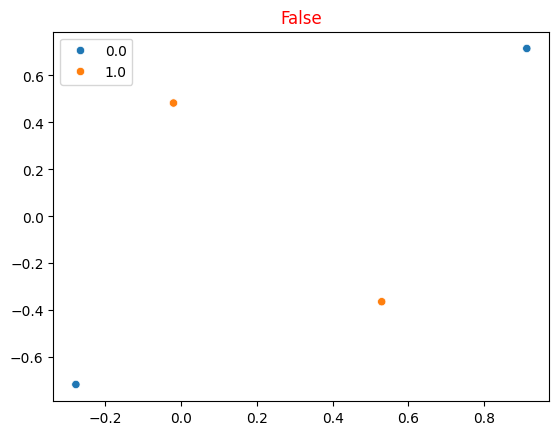

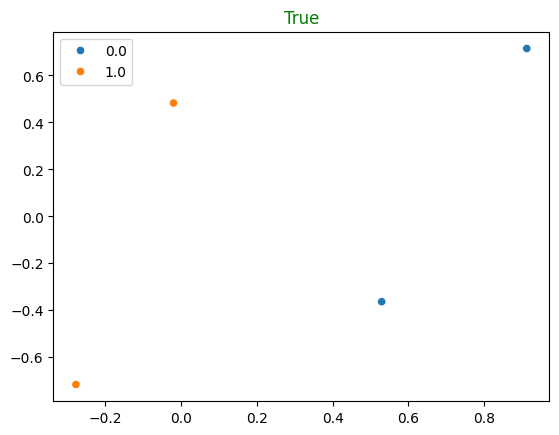

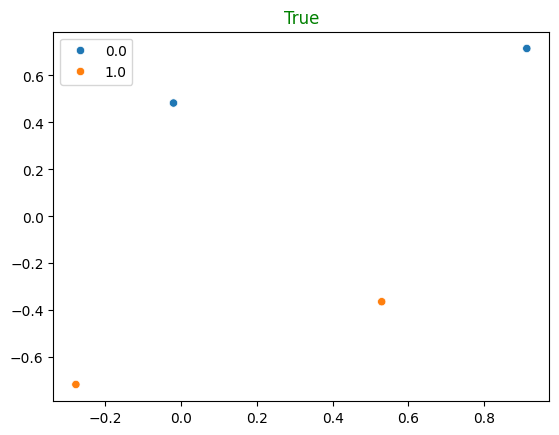

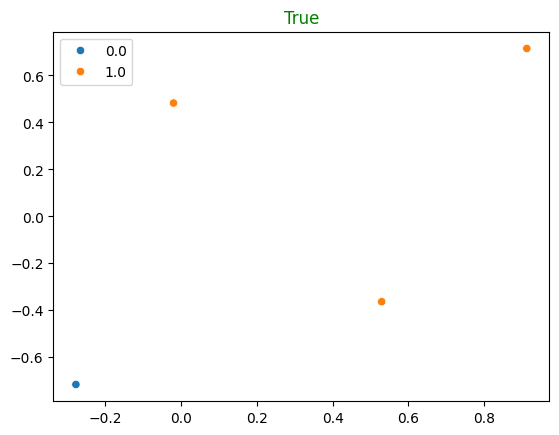

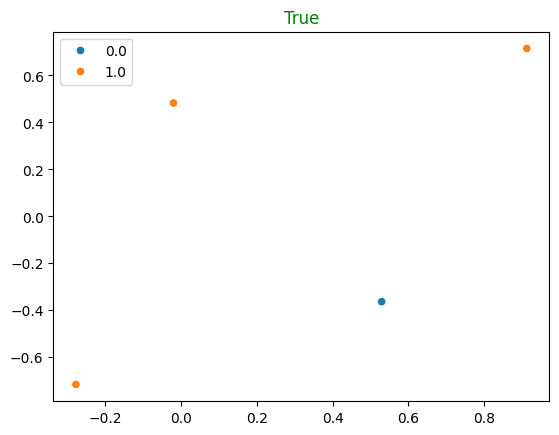

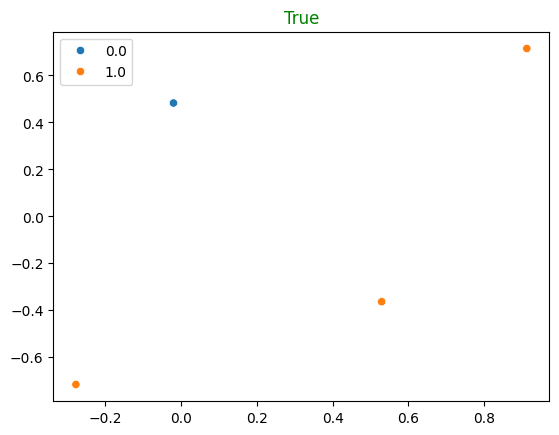

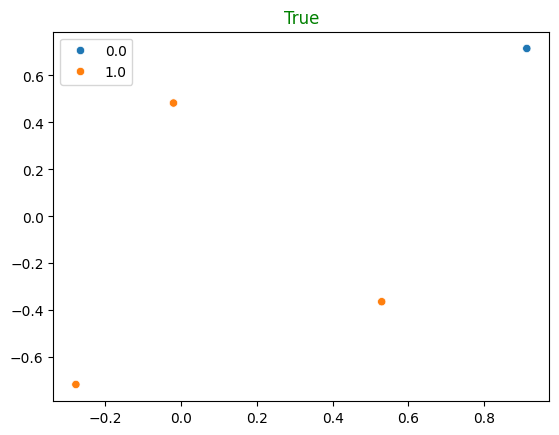

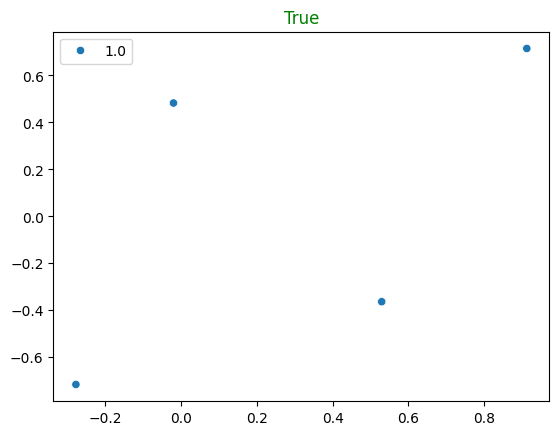

False

In [25]:
n = 4
d = 2
S_n = np.random.uniform(-1,1,size=(n,d))
is_shattered(d,n,S_n,visualise=True)

### d)

In [35]:
results = []
N = 50
for d in range(2,11):
    for n in range(d+1,d+3):
        for _ in range(N):
            X = np.random.uniform(-1,1,size=(n,d))
            shattered = is_shattered(d,n,X)
            results.append({
                'd' : d, 'n' : n, 'shattered' : shattered 
            })
df = pd.DataFrame(results)

In [94]:
df.groupby(['d','n'])['shattered'].value_counts().reset_index()

,d,n,shattered,count
0,2,2,True,50
1,2,3,True,49
2,2,3,False,1
3,2,4,False,50
4,3,3,True,50
5,3,4,True,49
6,3,4,False,1
7,3,5,False,50
8,4,4,True,50
9,4,5,True,48


In [ ]:
df.groupby(['d','n'])['shattered'].agg(pd.Series.mode)

In [ ]:
#conclusion:
#seems to be consistant with the lecture

### e)

In [28]:
results = []
N = 50
d = 3
# for d in range(2,11):
for n in range(d,d+10):
    for _ in range(N):
        X = np.random.uniform(-1,1,size=(n,d))
        shattered = is_shattered(d,n,X, kernel='rbf')
        results.append({
            'd' : d, 'n' : n, 'shattered' : shattered 
        })
    

In [30]:
df = pd.DataFrame(results)
df.groupby(['d','n'])['shattered'].value_counts().reset_index()

,d,n,shattered,count
0,3,3,True,50
1,3,4,True,50
2,3,5,True,50
3,3,6,True,50
4,3,7,True,50
5,3,8,True,50
6,3,9,True,50
7,3,10,True,50
8,3,11,True,50
9,3,12,True,50
